# **Prodigy Infotech - Machine Learning Internship**

### **TASK 4 - Group Customers using K-Means**

### Author : Muhammad Awais Akhter

[![alt text](https://logoeps.com/wp-content/uploads/2014/02/25231-github-cat-in-a-circle-icon-vector-icon-vector-eps.png "Git Hub Link")](https://github.com/awais-akhter)

### Problem Statement: Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

##### Dataset link :- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

### Importing Data

In [ ]:
# Importing Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the csv file
customer_data = pd.read_csv("PRODIGY_ML_02/Mall_Customers.csv")

In [ ]:
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


This is the customer dataset we will be working on. It has 4 features and one ID column.
The features are:


1. Numerical Features


> *   Age
*   Annual Income
*   Spending Score




2. Categorial Features


> *   Gender





In [ ]:
# Summary of the data
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Data Preprocessing and Visualization

#### Missing data

In [ ]:
# Checking for missing values
customer_data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There is no missing data

In [ ]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Pairplot

In [ ]:
numerical_columns = ["Age", "Annual Income (k$)","Spending Score (1-100)"]
categorical_columns = ["Gender"]

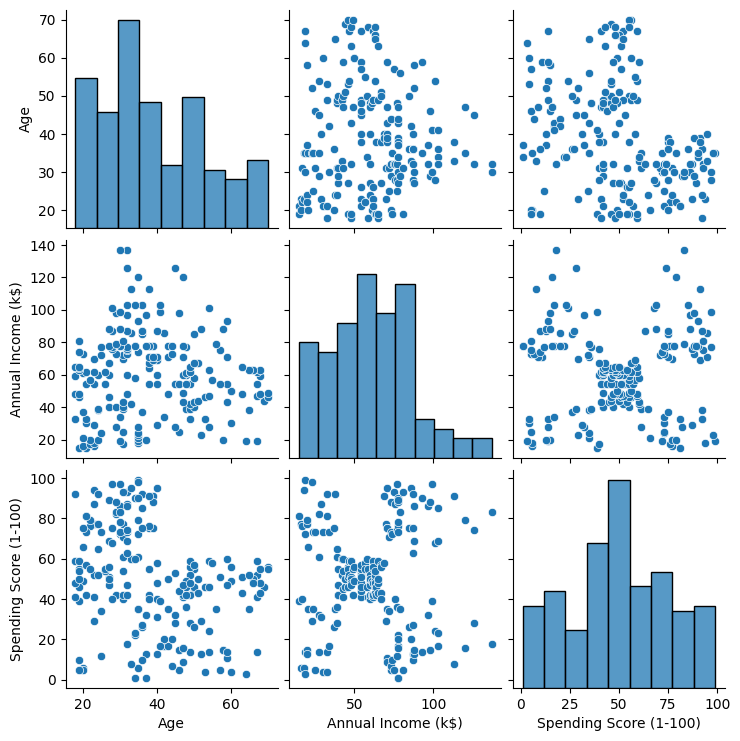

In [ ]:
# Visulaizing the relation between all features
sns.pairplot(customer_data[numerical_columns])
plt.show()

#### Encoding the Categorical features using OneHotEncoder(

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()
encoded_customer_data = ohe.fit_transform(customer_data[categorical_columns])
encoded_df = pd.DataFrame(encoded_customer_data.toarray(), columns=ohe.get_feature_names_out(categorical_columns))
encoded_df

,Gender_Female,Gender_Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
195,1.0,0.0
196,1.0,0.0
197,0.0,1.0
198,0.0,1.0


In [ ]:
customer_data.drop('Gender', axis = 1, inplace = True)

In [ ]:
customer_data_enc = pd.concat([customer_data, encoded_df], axis = 1)
customer_data_enc.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0.0,1.0
1,2,21,15,81,0.0,1.0
2,3,20,16,6,1.0,0.0
3,4,23,16,77,1.0,0.0
4,5,31,17,40,1.0,0.0


In [ ]:
customer_data_enc.set_index("CustomerID", inplace=True)

In [ ]:
customer_data_enc.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
CustomerID,,,,,
1,19,15,39,0.0,1.0
2,21,15,81,0.0,1.0
3,20,16,6,1.0,0.0
4,23,16,77,1.0,0.0
5,31,17,40,1.0,0.0


#### Scaling the data using StandardScaler()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_sc = StandardScaler()
def MyStandardScaler(df, col_names):
    features = df[col_names]
    std_sc.fit(features.values)
    features = std_sc.transform(features.values)
    df[col_names] = features
    return df

In [ ]:
customer_data_enc_scaled = MyStandardScaler(customer_data_enc, numerical_columns)
customer_data_enc_scaled

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
CustomerID,,,,,
1,-1.424569,-1.738999,-0.434801,0.0,1.0
2,-1.281035,-1.738999,1.195704,0.0,1.0
3,-1.352802,-1.700830,-1.715913,1.0,0.0
4,-1.137502,-1.700830,1.040418,1.0,0.0
5,-0.563369,-1.662660,-0.395980,1.0,0.0
...,...,...,...,...,...
196,-0.276302,2.268791,1.118061,1.0,0.0
197,0.441365,2.497807,-0.861839,1.0,0.0
198,-0.491602,2.497807,0.923953,0.0,1.0


#### Splitting the data to train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test = train_test_split(customer_data_enc_scaled, test_size = 0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((160, 5), (40, 5))

## USING KMEANS CLUSTERING

In [ ]:
from sklearn.cluster import KMeans
np.random.seed(0)

### Clustering using all features by feature reduction using PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)

In [ ]:
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

#### Using Elbow Plot to find optimal number of clusters

In [ ]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, n_init = 10)
    kmeans.fit(X_train_reduced)
    wcss.append(kmeans.inertia_)

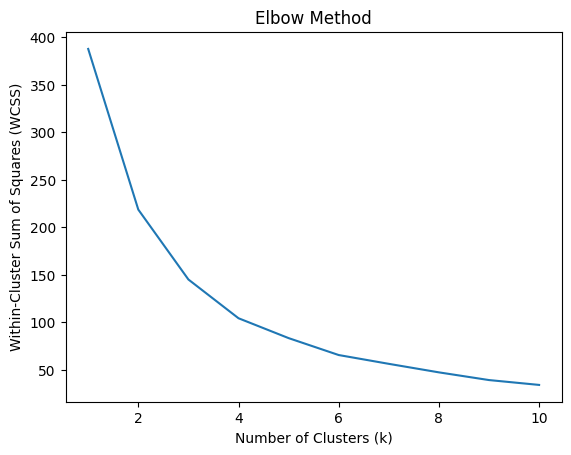

In [ ]:
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

#### Using Knee Locator to find the knee/elbow point

In [ ]:
%pip install kneed
from kneed import KneeLocator


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
kneeL = KneeLocator(range(1,11),wcss,curve = "convex", direction = "decreasing")

In [ ]:
kneeL.elbow

4

Hence, We use number of clusters = 4

#### Doing the actual KMeans Clustering

In [ ]:
num_clusters = 4

In [ ]:
kmeans = KMeans(n_clusters=num_clusters, n_init = 'auto')

In [ ]:
kmeans.fit(X_train_reduced)

KMeans(n_clusters=4, n_init='auto')

In [ ]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_
X_train_reduced

array([[ 7.91072719e-01, -9.91853301e-02],
       [-1.53202358e+00,  2.26505588e+00],
       [ 7.97213599e-01, -8.37621633e-01],
       [ 2.05017377e+00, -8.37439904e-01],
       [-2.13701885e-01,  2.35850955e-01],
       [-1.50548094e+00,  1.93029191e+00],
       [-1.44879501e+00, -1.64031495e+00],
       [-1.14879158e+00, -1.73779438e+00],
       [-1.46494184e+00,  2.24624927e-01],
       [ 5.90074089e-01,  1.89925800e-02],
       [-9.12205401e-01, -1.89798599e-01],
       [-1.49560313e+00,  7.96996382e-01],
       [-1.07476135e+00, -2.04050900e+00],
       [ 5.81038713e-01,  6.05782584e-01],
       [ 2.10963275e-01,  2.18388276e-01],
       [ 9.41934538e-01, -1.53447193e-01],
       [ 2.01022113e+00,  9.83791347e-01],
       [ 7.06921819e-01,  2.76683564e-01],
       [ 8.14653443e-01,  1.21821994e+00],
       [ 5.02571761e-01,  6.60049332e-02],
       [-8.63474869e-01,  8.86005369e-01],
       [-5.06518300e-01, -2.49207281e-01],
       [-1.15601360e+00, -1.56156976e+00],
       [ 2.

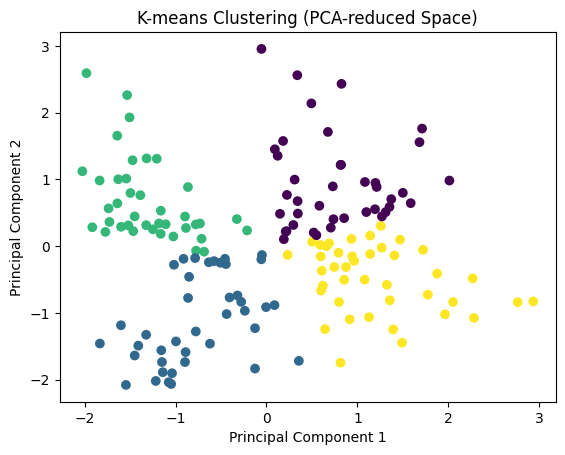

In [ ]:
plt.scatter(X_train_reduced[:,0], X_train_reduced[:,1],c = labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering (PCA-reduced Space)')
plt.show()

As we can see there are 4 distinct groups of customers which is clustered by using our KMeans Algorithm.

#### Evaluating the clustering using Silhouette Coefficient

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
sil_coeff = []
for k in range(2,12):
        kmeans_eval = KMeans(n_clusters=k,n_init='auto')
        kmeans_eval.fit(X_train_reduced)
        sil = silhouette_score(X_train_reduced,kmeans_eval.labels_)
        sil_coeff.append(sil)

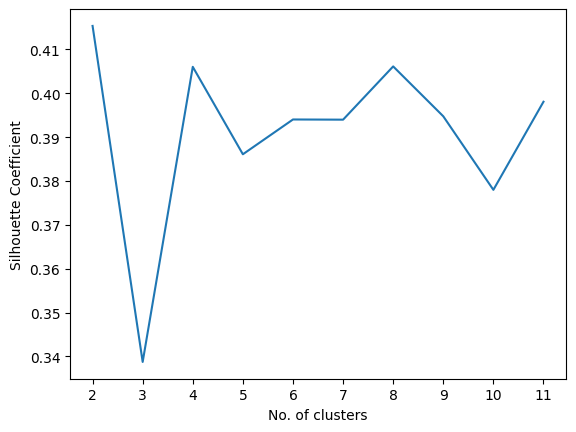

In [ ]:
plt.plot(range(2,12),sil_coeff)
plt.xticks(range(2,12))
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

Here, the optimal number of clusters is varying on every run. This discrepancy is potentially due to the dimensionality reduction (PCA).
So, we use 2 actual features to perform clustering.

### Clustering using 2 features : Annual Income and Spending Score

In [ ]:
X_train.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
CustomerID,,,,,
80,0.728432,-0.250391,-0.318337,1.0,0.0
198,-0.491602,2.497807,0.923953,0.0,1.0
39,-0.204535,-0.899272,-0.939482,1.0,0.0
25,1.087265,-1.242797,-1.405340,1.0,0.0
123,0.082532,0.322150,0.302808,1.0,0.0


In [ ]:
X_train_new = X_train[["Annual Income (k$)" , "Spending Score (1-100)"]]
X_test_new = X_test[["Annual Income (k$)" , "Spending Score (1-100)"]]

#### Elbow Plot

In [ ]:
wcss2 = []
for k in range(1,11):
    kmeans2 = KMeans(n_clusters=k, n_init = 10)
    kmeans2.fit(X_train_new)
    wcss2.append(kmeans2.inertia_)

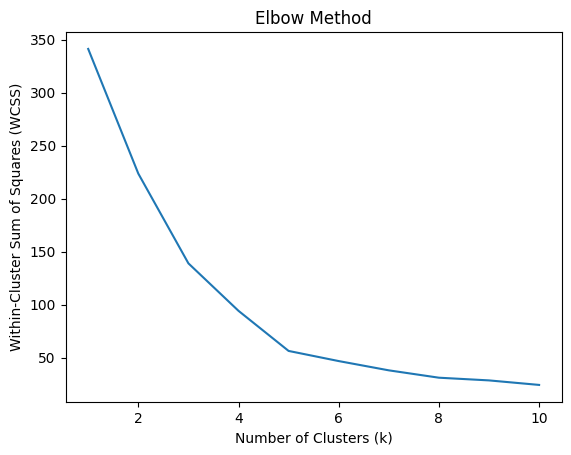

In [ ]:
plt.plot(range(1,11), wcss2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

#### Knee Locator

In [ ]:
kneeL2 = KneeLocator(range(1,11),wcss2,curve = "convex", direction = "decreasing")

In [ ]:
kneeL2.elbow

5

We use number of clusters = 5

#### KMeans

In [ ]:
num_clusters2 = 5

In [ ]:
kmeans2 = KMeans(n_clusters = num_clusters2, n_init = 10)

##### For training data

In [ ]:
kmeans2.fit(X_train_new)
labels2 = kmeans2.labels_
centers2 = kmeans2.cluster_centers_
X_train_new

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
80,-0.250391,-0.318337
198,2.497807,0.923953
39,-0.899272,-0.939482
25,-1.242797,-1.405340
123,0.322150,0.302808
...,...,...
107,0.093133,-0.007764
15,-1.548152,-1.444162
93,-0.021375,-0.046586


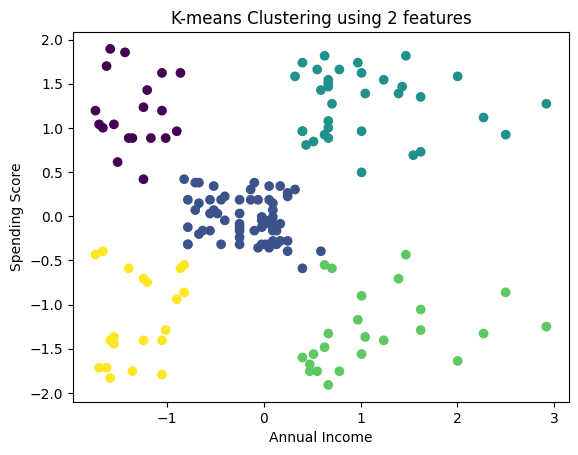

In [ ]:
plt.scatter(X_train_new["Annual Income (k$)"], X_train_new["Spending Score (1-100)"],c = labels2)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-means Clustering using 2 features')
plt.show()

##### For test data

In [ ]:
kmeans2.fit(X_test_new)
labels2 = kmeans2.labels_
centers2 = kmeans2.cluster_centers_

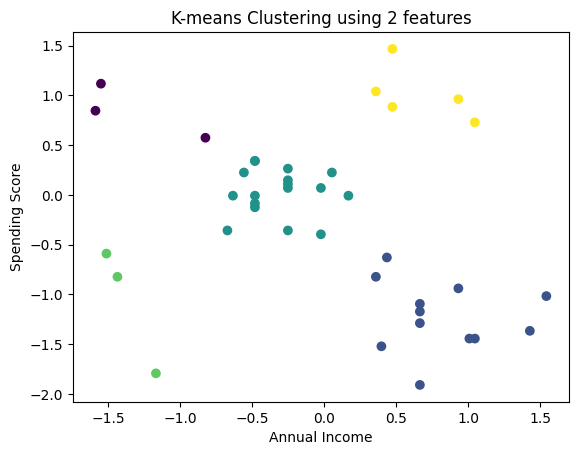

In [ ]:
plt.scatter(X_test_new["Annual Income (k$)"], X_test_new["Spending Score (1-100)"],c = labels2)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-means Clustering using 2 features')
plt.show()

#### Silhouette Coefficient

In [ ]:
sil_coeff2 = []
for k in range(2,12):
        kmeans_eval2 = KMeans(n_clusters=k,n_init='auto')
        kmeans_eval2.fit(X_train_new)
        sil2 = silhouette_score(X_train_new,kmeans_eval2.labels_)
        sil_coeff2.append(sil2)

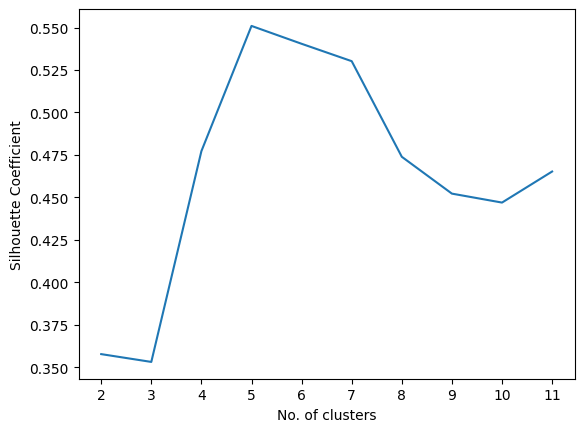

In [ ]:
plt.plot(range(2,12),sil_coeff2)
plt.xticks(range(2,12))
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

As we can see highest Silhouette Coefficient is when number of clusters = 5. This means our assumption of 5 clusters turned out to be correct.

### END OF THE CODE